# Neural Networks - A Practical Introduction
by _Minho Menezes_  

---

## Neural Networks - Learning

In this second notebook, we build the intelligent algorithms that will learn the optimal set of weights for the Neural Network task. This is the Supervisioned Learning approach, and it is fundamental in Machine Learning.

* [1. Evaluating Performance](#1.-Evaluating-Performance)  
* [2. Backpropagation](#2.-Backpropagation)  
* [3. Gradient Descent Training](#3.-Gradient-Descent-Training)  
* [4. Training a MLP for Binary Classification](#4.-Training-a-MLP-for-Binary-Classification)  
* [5. Training a MLP for Multiclass Classification](#5.-Training-a-MLP-for-Multiclass-Classification)  

---

### Libraries

In [1]:
## LIBRARIES ##
import numpy as np                         # Library for Numerical and Matricial Operations
import matplotlib.pyplot as plt            # Library for Generating Visualizations
import pandas as pd                        # Library for Handling Datasets
from tools.tools import Tools as tl        # Library for some Utilitary Tools

### Neural Network Class

In [2]:
## CLASS: Multilayer Perceptron ##
class MultilayerPerceptron:
    
    # CLASS CONSTRUCTOR
    def __init__(self, n_neurons=[2, 5, 1]):
        if(len(n_neurons) < 2):
            raise ValueError("The network must have at least two layers! (The input and the output layers)")
        
        # Network Architecture
        self.hidden_layers = len(n_neurons)-2
        self.n_neurons = n_neurons
        self.W = []
        
        # Adjusting the Network architecture
        for i in range(1, len(n_neurons)):
            self.W.append( np.random.randn(self.n_neurons[i-1]+1 , self.n_neurons[i]) )
        
    # ACTIVATION FUNCTION
    def activate(self,Z):
        return 1 / (1 + np.exp(-Z))
    
    # FORWARD PROPAGATION
    def forward(self, X):
        # Activation List
        A = []
        
        # Input Layer Activation
        A.append( np.vstack([np.ones([1, X.shape[1]]), X]) )
        
        # Hidden Layer Activation
        for i in range(0, self.hidden_layers):
            Z = np.matmul(self.W[i].T, A[-1])
            Z = self.activate(Z)
            
            A.append( np.vstack([np.ones([1, Z.shape[1]]), Z]) )
        
        # Output Layer Activation
        Z = np.matmul(self.W[-1].T, A[-1])
        Z = self.activate(Z)

        A.append(Z)
        
        return A
    
    # CLASSIFICATION PREDICTION
    def predict(self, X):
        A = self.forward(X)
        
        if(self.n_neurons[-1] > 1):
            return A[-1].argmax(axis=0)
        else:
            return (A[-1] > 0.5).astype(int)
    
    # LOSS FUNCTION
    def loss(self, y, y_hat):
        pass
    
    # ACCURACY FUNCTION
    def accuracy(self, y, y_hat):
        pass
    
    # BACKPROPAGATION
    def backpropagate(self, A, y):
        pass
    
    # GRADIENT DESCENT TRAINING
    def train(self, X_train, y_train, X_test, y_test, alpha=1e-3, maxIt=50000, tol=1e-5, verbose=False):
        pass
        
## ---------------------------- ##

---
### 1. Evaluating Performance

One of the first things to be defined in any Supervisioned Learning approach is the evaluation and error metrics used to tell the model how it performed, and allow it to correct his parameters.

An important metric is the **Loss Function**, that direcly be used in the training. In our case, we will use the function known as _Cross-Entropy Loss_:

$$
    \mathcal{L}(W) = -\frac{1}{m} \sum y\ log( \hat{y} ) + (1-y)\ log(1 - \hat{y} )
$$

While it is mathematically useful for the training, its values are hard to interpret. So, a more human-like performance metric consists in the **Accuracy Function**, that can be calculated as:

$$
    \text{Acc}(W) = -\frac{100}{m} \sum ( y = \hat{y} )
$$

Implement the two evaluation metrics below:

In [3]:
def loss(self, y, y_hat):
    m = y.shape[1]
    return -(1/m) * np.sum(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))

def accuracy(self, y, y_hat):
    m = y.shape[1]
    return (1/m) * np.sum(y == y_hat) * 100

MultilayerPerceptron.loss = loss
MultilayerPerceptron.accuracy = accuracy

Now, use these metrics to evaluate the performance of classifiction for the examples in the matrix $X$:

In [4]:
X = np.array([[ 5,  1, -2, -1],
              [ 4,  2,  0,  4],
              [ 3,  3,  1,  4],
              [ 2,  4, -1, -3]])    

y = np.array([[1, 1, 0, 0]])

brain = MultilayerPerceptron(n_neurons=[4, 5, 1])
A = brain.forward(X)
P = brain.predict(X)

print("# PERFORMANCE #")
print("Real: \t", y)
print("Ativado: ", A[-1])
print("Previsto: ", P)

print()
print("Cross-Entropy Loss: ", brain.loss(y, A[-1]))
print("Prediction Accuracy: {}%".format(brain.accuracy(y, P)))

# PERFORMANCE #
Real: 	 [[1 1 0 0]]
Ativado:  [[ 0.54736329  0.71574277  0.28165668  0.76805841]]
Previsto:  [[1 1 0 1]]

Cross-Entropy Loss:  0.682288585537
Prediction Accuracy: 75.0%


### 2. Backpropagation

The **Backpropagation** algorithm is one of the most popular and powerful techniques in traning multilayer models.

This algorithm allows the misclassification error to be distributed to the entire network, responsabilizing each neuron individually for its contribution to the faults. The algorithm work as follows.

The error in the output layer is directly the difference between the real value of the class for each sample subtracted by the probabilities calculated by the network. For all the subsequent layers, the error in each neuron is equal to:

$$
    e_i^{(l)} = \left( e_1^{(l+1)} W_1^{(l)} + e_2^{(l+1)} W_2^{(l)} + \cdots + e_n^{(l+1)} W_n^{(l)} \right) \cfrac{d \varphi(S_{i_\text{net}}^{(l)})}{dW}
$$

Where the derivative is equal to:

$$
    \cfrac{d \varphi(S_{i_\text{net}}^{(l)})}{dW} = A_i^{(l)}(1-A_i^{(l)})
$$

Using matrix multiplication, the backpropagation of the error between two layers is:

$$
    \mathbf{E}^{(l)} = \mathbf{W}^{(l)} \mathbf{E}^{(l+1)} \mathbf{A}^{(l)} (1 - \mathbf{A}^{(l)})
$$

Implement the backpropagation method in the cell below:

In [5]:
def backpropagate(self, A, y):
    # A primeira matriz de erros é calculada diretamente da diferença entre a classe real e a prevista
    E = []
    E.append( A[-1] - y )

    # O erro é, então, propagado para trás até termos os erros da primeira Camada oculta
    for i in range(self.hidden_layers, 0, -1):
        E.append( np.matmul(self.W[i], E[-1]) * A[i] * (1-A[i]) )
        E[-1] = E[-1][1:,:]
        
    # Retornamos o erro calculado em todas as camadas, na ordem inversa do cálculo
    return E[::-1]

MultilayerPerceptron.backpropagate = backpropagate

Now, experiment the _backpropagation()_ method in the example below:

In [6]:
X = np.array([[ 5,  1, -2, -1],
              [ 4,  2,  0,  4],
              [ 3,  3,  1,  4],
              [ 2,  4, -1, -3]])    

y = np.array([[1, 1, 0, 0]])

brain = MultilayerPerceptron(n_neurons=[4, 5, 1])

A = brain.forward(X)
E = brain.backpropagate(A, y)

print("# PERFORMANCE #")
print("Real: \t", y)
print("Ativado: ", A[-1])

print()
print("Erro na Camada Oculta:\n", E[0])
print("\nErro na Camada de Saída:\n", E[1])

# PERFORMANCE #
Real: 	 [[1 1 0 0]]
Ativado:  [[ 0.79142126  0.78253268  0.71009853  0.77142947]]

Erro na Camada Oculta:
 [[  8.77700723e-07   3.75090693e-06  -7.69864351e-02  -4.02496606e-02]
 [ -1.35930969e-03  -6.94889712e-03   7.59600083e-02   5.91861672e-02]
 [  2.65438896e-02   6.55118764e-04  -3.13888110e-02  -3.80362017e-03]
 [ -4.11555635e-03  -2.95422008e-02   1.20267399e-02   9.91632806e-02]
 [ -2.68972274e-05  -1.84465579e-03   3.91674419e-02   4.34797567e-06]]

Erro na Camada de Saída:
 [[-0.20857874 -0.21746732  0.71009853  0.77142947]]


### 3. Gradient Descent Training

The **Gradient Descent** is the most popular iterative algorithm to optimize loss functions.

The algorithm works as follows:

Given a Multilayer Neural Network with $L$ layers, where $A^{(l)}$ is the activation matrix in each layer $l$, and $E^{(l)}$ is the error matrix for each layer $l$:

1. Calculate the activation $\mathbf{A}^{(l)}$ and the errors $\mathbf{E}^{(l)}$ using $\mathbf{W}^{(i)}$;  

2. Evaluate the current performance using the _Loss Function_ and the _Accuracy Metric_;
   
3. Update the network weights:

    $$ 
        \mathbf{W}^{(i+1)} = \mathbf{W}^{(i+1)} - \alpha \nabla \mathcal{L}(\mathbf{W}^{(i)})
    $$
    
    where $\alpha$ is a scaling factor (mostly between 1 and 0) called _Learning Rate_, and $\nabla \mathcal{L}(\mathbf{W}^{(i)})$ represents the gradient of the _cost function_, and can be calculated as:
    
    $$ 
        \nabla \mathcal{L}(\mathbf{W}^{(i)}) = (A^{(l)}) E^{(l)^T}
    $$  <br>
    
4. Print the training results at each 50 epochs  <br>

5. Check for convergence by comparing the decrease in the _Loss Function_; <br>

6. If the training did not converged, go back to Step 1. <br>

In [7]:
def train(self, X_train, y_train, alpha=1e-3, maxIt=50000, tol=1e-5, verbose=False):
    m = X_train.shape[1]
    
    # Define o Histórico de Erros e algumas variáveis auxiliares
    errorHist = []
    previousLoss = 0
    
    # Realiza o treino por Gradiente Descendente
    for it in range(0, maxIt):
        # 1. Calculamos a ativação de todos os neurônios (Forward Propagation) e 
        #    retropropagamos o erro da predição (Backpropagation)
        A = self.forward(X_train)
        E = self.backpropagate(A, y_train)
        P = self.predict(X_train)
        
        # 2. Calculamos o erro MSE, a acurácia do modelo e adicionamos o resultado no histórico.
        actualLoss = self.loss(y_train, A[-1])
        actualAcc = self.accuracy(y_train, P)
        errorHist.append(actualLoss)
        
        # 3. Realizamos o passo do Gradiente Descendente.        
        for i in range(0, self.hidden_layers+1):
            self.W[i] = self.W[i] - (alpha/m) * np.matmul(A[i], E[i].T)
        
        # 4. Imprimimos o resultado do treinamento a cada 50 épocas.
        if(it % 50 == 0 and verbose): 
            print("## Iteration", it, "##")
            print("Cross-Entropy Loss: \t", actualLoss)
            print("Accuracy (Training Set): {0:.3f}%".format(actualAcc))
            print("Weights\nS -> H:\n", self.W[0], "\nH -> O:\n", self.W[1])
            print("\n")
        
        # 5. Verificamos uma possivel convergência do treinamento, e então encerramos o laço.
        if(abs(actualLoss - previousLoss) <= tol):
            print("!!! Convergence reached !!!")
            print("## Iteration", it, "##")
            print("Cross-Entropy Loss: \t", actualLoss)
            print("Accuracy (Training Set): {0:.3f}%".format(actualAcc))
            print("Weights\nS -> H:\n", self.W[0], "\nH -> O:\n", self.W[1])
            print("\n")
            break;
            
        # 6. Atualizamos as variáveis auxiliares para as próximas iterações.
        previousLoss = actualLoss
    
    # Fim do Treinamento
    return errorHist

MultilayerPerceptron.train = train

### 4. Training a MLP for Binary Classification

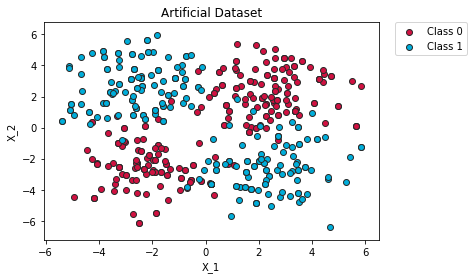

In [8]:
## CARREGANDO E VISUALIZANDO OS DADOS ##
X_train, X_test, y_train, y_test = tl.loadData("data/toy_data_01.csv")
tl.plotData(X_train, y_train)

In [9]:
brain = MultilayerPerceptron(n_neurons=[2,10,1])
errorHist = brain.train(X_train, y_train, alpha=0.1)

!!! Convergence reached !!!
## Iteration 3116 ##
Cross-Entropy Loss: 	 0.175455961374
Accuracy (Training Set): 95.000%
Weights
S -> H:
 [[-2.78551104 -2.01736768  1.37555724  2.49924298 -3.10351227 -1.94271747
  -0.16011587 -3.23236854 -1.85791356  3.02390194]
 [-0.98394269  0.60303809 -1.04059287 -0.67026191  1.19045703  0.59344061
  -0.36054921 -1.51375542  0.80099959  1.00543563]
 [ 0.93782892  0.69160844 -0.60462288 -0.78255775 -0.91666401  0.67485878
  -0.80722616 -1.20451783 -0.76823463 -0.99048563]] 
H -> O:
 [[ 0.82969976]
 [ 3.14086138]
 [-1.97547496]
 [ 0.86595786]
 [ 2.15244485]
 [ 4.06671875]
 [-1.90172778]
 [-0.43641572]
 [-4.72281037]
 [ 1.80427269]
 [-4.02834417]]




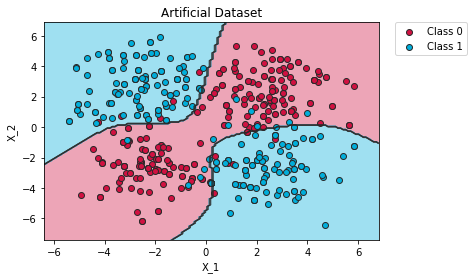

In [10]:
## VISUALIZAÇÃO DA CLASSIFICAÇÃO ##
tl.plotClassContour(X_train, y_train, brain)

### 5. Training a MLP for Multiclass Classification

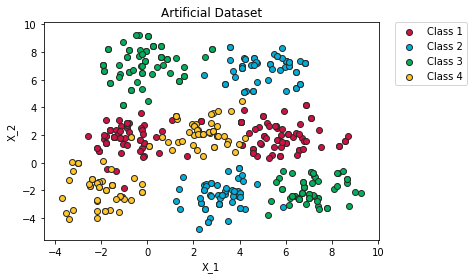

In [11]:
## CARREGANDO E VISUALIZANDO OS DADOS ##
X_train, X_test, y_train, y_test = tl.loadData("data/toy_data_02.csv")
tl.plotData(X_train, y_train)

In [17]:
brain = MultilayerPerceptron(n_neurons=[2,10,4])
errorHist = brain.train(X_train, y_train, alpha=0.1)

!!! Convergence reached !!!
## Iteration 10012 ##
Cross-Entropy Loss: 	 0.357576716265
Accuracy (Training Set): 102.708%
Weights
S -> H:
 [[ 7.37979218 -1.79211342 -0.68688204 -5.23293124 -0.64158995 -4.61120874
  -2.19876871  6.92009987  5.37669319 -0.0575788 ]
 [ 0.23944442  0.3622683  -2.64351052  1.75905676 -4.16425286 -2.05807377
   2.03688388 -1.21717139  0.37437338 -1.95493087]
 [-1.80068554 -3.70578412 -1.05535427 -0.88197157  1.61209209 -1.60079969
   1.15056328  0.56606441 -1.47771375 -4.0158398 ]] 
H -> O:
 [[-1.03496214 -0.55945631  0.12314857 -4.31894933]
 [ 3.45221148 -5.06878977 -3.3621717   3.67355746]
 [-7.25136578  3.65903835  6.00160668 -1.58614283]
 [ 1.77812959 -3.00918902 -0.80878826  0.09125958]
 [ 4.29342458  2.35711891  2.88790443 -7.30611634]
 [ 1.37732686 -8.75865072  8.22366564 -4.03240925]
 [-2.52736847 -2.10711382 -1.34135472  6.03237918]
 [-3.76349705  0.38369334  2.49737869  1.26863864]
 [-1.49429654  4.77354413 -6.72285444 -0.36671435]
 [ 1.10069438 -4.

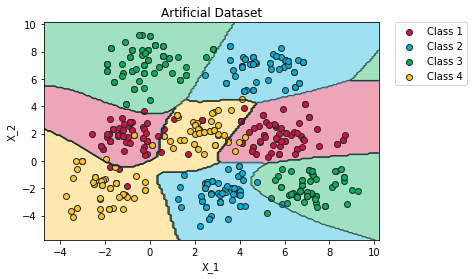

In [18]:
tl.plotClassContour(X_train, y_train, brain)